In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


'2019-03-18 08:54:00.984095'

In [2]:
WB = pd.read_excel(
    '/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/Water Budget_gauged.xlsx', 
    sheet_name='Total Monthly')
# st_clair_basin = WB.iloc[7].values[1:-4]
# st_clair_river = WB.iloc[38].values[1:-4]

# st_clair_inflow = st_clair_basin + st_clair_river
# detroit_river = WB.iloc[45].values[1:-4]
# st_clair_inflow_cms = st_clair_inflow*1e9/365/24/3600
# st_clair_river_cms = st_clair_river*1e9/365/24/3600
# detroit_river_cms = detroit_river*1e9/365/24/3600



WB.reset_index(inplace=True)

StClairNS = WB.iloc[1][2:].values + WB.iloc[2][2:].values

WesternNS = WB.iloc[7][2:].values + WB.iloc[8][2:].values

CentralNS = WB.iloc[12][2:].values + WB.iloc[13][2:].values

EasternNS = WB.iloc[17][2:].values + WB.iloc[18][2:].values

niagara = WB.iloc[22][2:].values

detroit = WB.iloc[6][2:].values

st_clair_river = WB.iloc[0][2:].values


total_runoff= WesternNS+CentralNS+EasternNS+StClairNS
total_inflows = total_runoff + st_clair_river
total_runoff_excl= WesternNS+CentralNS+EasternNS




In [3]:
StClairNS

array([183.28290500000003, 176.456896, 285.125248, 220.74100400000003,
       144.91493499999999, 81.06490099999999, 46.045018, 36.81587,
       44.886631, 74.216376, 106.01003399999999, 172.488184], dtype=object)

In [4]:
Precip_mm = pd.read_excel('../../measurements/glerl/Precip_Lake.xlsx', sheetname='ERI_mm', skiprows=3)
Precip_mm['Total'] = pd.to_numeric(Precip_mm['Total'], errors='coerce')
Precip_mm['Year'] = pd.to_numeric(Precip_mm['Year'], errors='coerce')

Runoff_mm = pd.read_excel('../../measurements/glerl/Runoff.xlsx', sheetname='ERI_mm', skiprows=4)
Runoff_mm['Ann'] = pd.to_numeric(Runoff_mm['Ann'], errors='coerce')
Runoff_mm['YEAR'] = pd.to_numeric(Runoff_mm['YEAR'], errors='coerce')

Evap_mm = pd.read_excel('../../measurements/glerl/Evaporation.xlsx', sheetname='ERI', skiprows=3)
Evap_mm['Ann'] = pd.to_numeric(Evap_mm['Ann'], errors='coerce')
Evap_mm['Year'] = pd.to_numeric(Evap_mm['Year'], errors='coerce')

WindSpeed_Overlake = pd.read_excel('../../measurements/glerl/WindSpeed_Overlake.xlsx', sheetname='ERI', skiprows=3)
WindSpeed_Overlake['Annual'] = pd.to_numeric(WindSpeed_Overlake['Annual'], errors='coerce')
WindSpeed_Overlake['Year'] = pd.to_numeric(WindSpeed_Overlake['Year'], errors='coerce')



In [5]:
Runoff_mm[105:119].mean()[1:13]

JAN    114.226763
FEB     91.581745
MAR    164.926388
APR    115.514231
MAY     90.762773
JUN     67.904277
JUL     48.885788
AUG     30.530336
SEP     29.430294
OCT     43.392388
NOV     59.757487
DEC    113.965250
dtype: float64

In [14]:
Area = 26858*1e6 #m2

Area_ecl_stClair = 25744*1e6 #m2

conversion_fac_mmy_to_cms = Area_ecl_stClair/1000/365/24/3600

conversion_fac_mmy_to_cms_incl_clair = Area/1000/365/24/3600

In [15]:
Runoff_mm[105:119]

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Ann
105,2003.0,43.885115,32.556596,145.599700,95.149597,134.931956,63.821696,91.409519,45.939250,53.616075,49.658787,84.874384,131.600110,967.885242
106,2004.0,78.733496,58.923522,162.715405,85.966655,156.391463,119.089793,34.307490,42.682440,48.175900,19.418921,62.354241,109.263087,976.590765
107,2005.0,298.361254,143.772021,95.536548,151.859935,38.746130,18.746111,24.867433,16.560224,30.845809,30.278426,57.557528,81.017952,993.138584
108,2006.0,151.181611,115.049433,98.286858,61.729942,98.778767,64.086948,66.662979,23.404214,33.735334,119.548352,88.546553,179.396522,1099.906963
109,2007.0,236.293242,29.021928,221.810081,106.173161,48.023608,19.874689,11.900642,88.563328,19.799047,14.949015,59.375963,156.453994,1002.955237
110,2008.0,136.762022,218.885121,264.325772,128.907119,64.226365,63.337588,64.629688,21.248987,30.058123,23.137416,53.265096,164.115052,1236.903409
111,2009.0,46.597907,181.136894,205.699036,126.181989,70.009416,48.361475,26.075318,31.426907,16.320523,35.327783,29.161513,69.597755,895.462879
112,2010.0,61.248859,27.330371,159.381475,71.468601,114.858546,91.016517,31.059018,15.569112,12.708868,20.171374,39.007079,52.153763,692.761251
113,2011.0,49.956850,107.373886,289.506901,202.374686,235.851358,55.992243,34.173049,32.996429,58.987667,109.576783,142.103122,249.146435,1564.848224
114,2012.0,157.524312,81.786879,121.284622,31.341012,40.309399,16.151085,9.628692,12.167440,15.810191,54.595588,44.074086,58.783064,642.143895


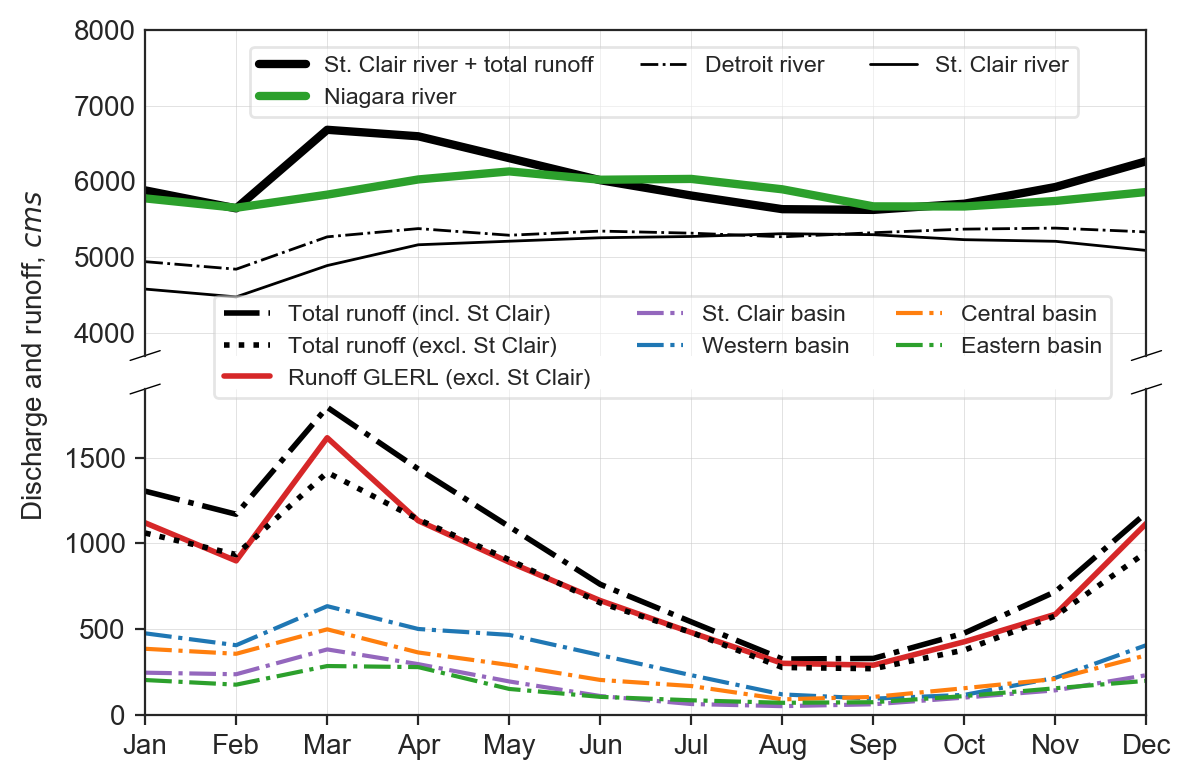

In [64]:
f, axes = plt.subplots(2,1, figsize=(6,4), dpi=200, sharex=True)


gauged_area = 0.75


axes[1].plot(np.linspace(1,12,12), total_runoff/gauged_area, 
          lw=2, ls='-.', c='k', label='Total runoff (incl. St Clair)',zorder=1)
axes[1].plot(np.linspace(1,12,12), total_runoff_excl/gauged_area, 
          lw=2, ls=':', c='k', label='Total runoff (excl. St Clair)', zorder=10)
axes[1].plot(np.linspace(1,12,12), 12*conversion_fac_mmy_to_cms*Runoff_mm[105:119].mean()[1:13], 
             c=sns.color_palette()[3], ls='-', lw=2, label='Runoff GLERL (excl. St Clair)')
axes[1].plot(np.linspace(1,12,12), StClairNS/gauged_area, c=sns.color_palette()[4], lw=1.5, ls='-.', label='St. Clair basin')
axes[1].plot(np.linspace(1,12,12), WesternNS/gauged_area, c=sns.color_palette()[0], lw=1.5, ls='-.', label='Western basin')
axes[1].plot(np.linspace(1,12,12), CentralNS/gauged_area, c=sns.color_palette()[1], lw=1.5, ls='-.', label='Central basin')
axes[1].plot(np.linspace(1,12,12), EasternNS/gauged_area, c=sns.color_palette()[2], lw=1.5, ls='-.', label='Eastern basin')

months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']
plt.xticks(np.linspace(1,12,12), [m[:3] for m in months])

axes[1].set_xlabel('')
axes[1].grid(lw=0.2)
axes[0].grid(lw=0.2)

axes[1].set_ylim(0,None)
axes[1].set_xlim(1,12)
# axes[1].set_ylabel('$mm$')
# axes[1].set_ylabel('River inflows, cms')




axes[0].plot(np.linspace(1,12,12), total_runoff/gauged_area + st_clair_river, c='k', lw=3, label='St. Clair river + total runoff')
axes[0].plot(np.linspace(1,12,12), niagara, c=sns.color_palette()[2], lw=3, label='Niagara river')
axes[0].plot(np.linspace(1,12,12), detroit, 'k-.', lw=1, label='Detroit river')
axes[0].plot(np.linspace(1,12,12), st_clair_river, c='k' ,lw=1, label='St. Clair river')



axes[0].set_ylim(3700,8000)
axes[1].set_ylim(0,1900)

axes[0].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
# axes[0].xaxis.tick_top()
axes[0].tick_params(axis=u'both', which=u'both',length=0)
axes[0].tick_params(labeltop='off')  # don't put tick labels at the top
# axes[1].xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=axes[0].transAxes, color='k', clip_on=False)
axes[0].plot((-d, +d), (-d, +d), **kwargs, lw=0.5)        # top-left diagonal
axes[0].plot((1 - d, 1 + d), (-d, +d), **kwargs, lw=0.5)  # top-right diagonal

kwargs.update(transform=axes[1].transAxes)  # switch to the bottom axes
axes[1].plot((-d, +d), (1 - d, 1 + d), **kwargs, lw=0.5)  # bottom-left diagonal
axes[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs, lw=0.5)  # bottom-right diagonal
plt.subplots_adjust(hspace=0.03, left=0.5)

# axes[0].legend(title='Connecting channels', loc=1,  bbox_transform=f.transFigure, frameon=1, framealpha=0.5, fontsize='small')
# axes[1].legend(title = 'Runoff' ,bbox_to_anchor=(0.89,0.35), loc="lower right",  bbox_transform=f.transFigure, frameon=1, framealpha=0.5, fontsize='small')

axes[0].text(-0.11,0.,'Discharge and runoff, $cms$',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes,
                rotation='vertical')
handles, labels = axes[0].get_legend_handles_labels()
f.legend( handles, labels, loc = (0.21, 0.85), ncol=3, frameon=1, framealpha=0.5, fontsize='small' )
handles, labels = axes[1].get_legend_handles_labels()
f.legend( handles, labels, loc = (0.18, 0.49), ncol=3, frameon=1, framealpha=0.5 ,fontsize='small')
plt.tight_layout()
plt.gcf().subplots_adjust(left=0.12)
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/total_mass_balance_montly.pdf', dpi=f.dpi)


In [17]:
Precip_mm['Year'] = pd.to_numeric(Precip_mm['Year'], errors='coerce')

Evap_mm['Year'] = pd.to_numeric(Evap_mm['Year'], errors='coerce')

GLERL_mm = Precip_mm.merge(Evap_mm, left_on='Year', right_on='Year', suffixes=('_Prceip', '_Evap'), how='outer')

In [18]:
delta = Precip_mm.set_index('Year') - Evap_mm.set_index('Year')

In [19]:
delta[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']][2002:2016].mean()

JAN    15.250667
FEB    28.926667
MAR    46.452667
APR    66.901429
MAY    71.960714
JUN    50.051429
JUL    21.014286
AUG   -34.122857
SEP   -51.200714
OCT   -90.132143
NOV   -58.794286
DEC   -15.395000
dtype: float64

In [20]:
GLERL_mm[GLERL_mm.Year>2002]

,Year,JAN_Prceip,FEB_Prceip,MAR_Prceip,APR_Prceip,MAY_Prceip,JUN_Prceip,JUL_Prceip,AUG_Prceip,SEP_Prceip,OCT_Prceip,NOV_Prceip,DEC_Prceip,Total,JAN_Evap,FEB_Evap,MAR_Evap,APR_Evap,MAY_Evap,JUN_Evap,JUL_Evap,AUG_Evap,SEP_Evap,OCT_Evap,NOV_Evap,DEC_Evap,Ann
103,2003.0,26.81,36.31,42.32,50.67,97.95,55.32,74.91,51.54,127.89,57.64,82.26,70.42,774.04,17.73,7.61,6.62,1.68,-4.57,12.07,56.81,94.44,166.17,175.14,129.61,101.35,764.66
104,2004.0,55.06,18.82,84.91,68.21,158.58,63.32,118.08,66.97,44.63,54.78,61.96,69.39,864.71,52.89,15.01,9.43,7.83,20.40,58.29,76.25,117.67,175.27,155.27,96.93,99.72,884.96
105,2005.0,82.52,40.70,21.47,79.10,30.87,54.91,88.43,97.48,97.25,52.35,84.94,48.42,778.44,40.34,15.37,14.52,3.19,13.83,18.76,73.58,109.15,145.36,189.05,162.97,94.97,881.09
106,2006.0,57.38,47.68,53.05,58.24,97.86,86.34,146.79,80.02,126.37,128.37,63.30,80.74,1026.14,24.34,40.30,21.80,10.88,21.62,34.14,62.26,134.32,162.66,199.26,80.39,95.34,887.31
107,2007.0,107.63,28.07,58.68,67.43,41.80,41.92,69.72,130.95,91.66,61.16,92.41,100.63,892.06,56.96,35.25,13.43,6.93,6.66,37.49,68.27,98.95,130.84,161.91,161.28,99.49,877.46
108,2008.0,61.51,103.12,92.58,47.16,75.84,111.70,101.55,65.30,92.49,74.65,106.18,107.82,1039.90,51.26,26.84,18.32,2.14,18.55,22.43,57.96,112.19,123.75,199.74,134.86,96.42,864.46
109,2009.0,55.00,63.21,103.86,94.62,61.42,102.90,91.08,97.52,69.35,99.93,36.42,75.42,950.73,41.62,14.14,9.28,1.57,9.68,22.81,63.89,99.95,134.73,166.92,99.14,119.70,783.43
110,2010.0,53.85,47.05,46.99,71.31,107.39,103.45,100.40,46.38,98.88,113.26,96.98,62.41,948.35,43.24,19.80,7.80,10.15,17.71,46.16,75.93,103.27,161.81,187.96,136.50,99.67,910.00
111,2011.0,51.21,91.78,100.72,145.95,161.68,79.83,91.29,121.36,137.39,123.88,124.44,100.22,1329.75,34.67,21.73,13.20,5.54,15.44,53.61,79.60,136.64,145.48,176.07,128.79,80.92,891.69
112,2012.0,77.02,39.16,69.94,34.32,61.60,60.57,93.69,88.08,111.09,158.63,29.80,87.90,911.80,55.61,26.21,19.71,44.19,35.23,70.62,103.51,134.78,170.80,172.55,114.81,73.88,1021.90


# Baseflow

In [21]:
import os

In [22]:
root = '/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Base Flow/data/'
res_m = pd.DataFrame(columns=['month']).set_index('month')
for path, subdirs, files in os.walk(root):
    for name in files:
        if 'csv' in name and 'BaseFlow' in name:
#             print(os.path.join(path, name))
            river = pd.read_csv(os.path.join(path, name))
            river = river[(river.year>2002) & (river.year<2019)]
            river_m = river.groupby(['month']).mean()
            river_m['baseflow'] = river_m['baseflow']*0.028316847
            river_m['flow'] = river_m['flow']*0.028316847
            river_m = river_m[['baseflow', 'flow']]
            river_m = river_m[['baseflow']]
            river_m = river_m.rename(index=str, columns={'baseflow': name[9:-7]+'baseflow', 'flow': name[9:-7]+'flow'})
            res_m = res_m.merge(river_m, left_index=True, right_index=True, how='outer')

In [23]:
baseflow = res_m.T.sum()

In [35]:
delta[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']][2002:2016].mean()

JAN    15.250667
FEB    28.926667
MAR    46.452667
APR    66.901429
MAY    71.960714
JUN    50.051429
JUL    21.014286
AUG   -34.122857
SEP   -51.200714
OCT   -90.132143
NOV   -58.794286
DEC   -15.395000
dtype: float64

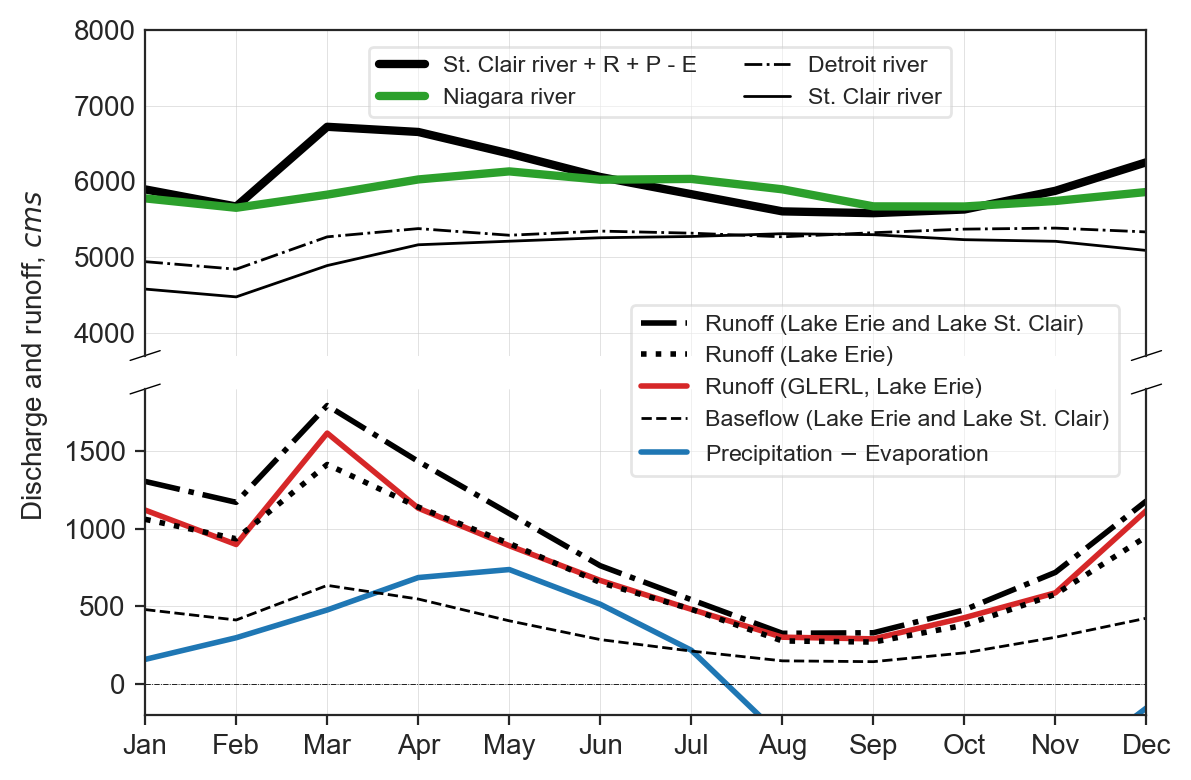

In [39]:
f, axes = plt.subplots(2,1, figsize=(6,4), dpi=200, sharex=True)


gauged_area = 0.75



axes[1].plot(np.linspace(1,12,12), total_runoff/gauged_area, 
          lw=2, ls='-.', c='k', label='Runoff (Lake Erie and Lake St. Clair)',zorder=1)
axes[1].plot(np.linspace(1,12,12), total_runoff_excl/gauged_area, 
          lw=2, ls=':', c='k', label='Runoff (Lake Erie)', zorder=10)
axes[1].plot(np.linspace(1,12,12), 12*conversion_fac_mmy_to_cms*Runoff_mm[105:119].mean()[1:13], 
             c=sns.color_palette()[3], ls='-', lw=2, label='Runoff (GLERL, Lake Erie)')



axes[1].plot(np.linspace(1,12,12), baseflow/gauged_area, 
           c='k', ls='--', lw=1, label='Baseflow (Lake Erie and Lake St. Clair)')

axes[1].plot(np.linspace(1,12,12),
         12*conversion_fac_mmy_to_cms_incl_clair*delta[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']][2002:2016].mean(),
          lw=2, ls='-', c=sns.color_palette()[0], 
             label='Precipitation $-$ Evaporation',zorder=1)



# axes[1].plot(np.linspace(1,12,12), StClairNS/gauged_area, c=sns.color_palette()[4], lw=1.5, ls='-.', label='St. Clair basin')
# axes[1].plot(np.linspace(1,12,12), WesternNS/gauged_area, c=sns.color_palette()[0], lw=1.5, ls='-.', label='Western basin')
# axes[1].plot(np.linspace(1,12,12), CentralNS/gauged_area, c=sns.color_palette()[1], lw=1.5, ls='-.', label='Central basin')
# axes[1].plot(np.linspace(1,12,12), EasternNS/gauged_area, c=sns.color_palette()[2], lw=1.5, ls='-.', label='Eastern basin')

months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']
plt.xticks(np.linspace(1,12,12), [m[:3] for m in months])

axes[1].set_xlabel('')
axes[1].grid(lw=0.2)
axes[0].grid(lw=0.2)

axes[1].set_ylim(0,None)
axes[1].set_xlim(1,12)
# axes[1].set_ylabel('$mm$')
# axes[1].set_ylabel('River inflows, cms')


axes[1].axhline(y=0, c='k', ls='-.', lw=0.3)




axes[0].plot(np.linspace(1,12,12), total_runoff/gauged_area + st_clair_river + conversion_fac_mmy_to_cms_incl_clair*delta[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']][2002:2016].mean(), c='k', lw=3, label='St. Clair river + R + P - E')
axes[0].plot(np.linspace(1,12,12), niagara, c=sns.color_palette()[2], lw=3, label='Niagara river')
axes[0].plot(np.linspace(1,12,12), detroit, 'k-.', lw=1, label='Detroit river')
axes[0].plot(np.linspace(1,12,12), st_clair_river, c='k' ,lw=1, label='St. Clair river')



axes[0].set_ylim(3700,8000)
axes[1].set_ylim(-200,1900)

axes[0].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
# axes[0].xaxis.tick_top()
axes[0].tick_params(axis=u'both', which=u'both',length=0)
axes[0].tick_params(labeltop='off')  # don't put tick labels at the top
# axes[1].xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=axes[0].transAxes, color='k', clip_on=False)
axes[0].plot((-d, +d), (-d, +d), **kwargs, lw=0.5)        # top-left diagonal
axes[0].plot((1 - d, 1 + d), (-d, +d), **kwargs, lw=0.5)  # top-right diagonal

kwargs.update(transform=axes[1].transAxes)  # switch to the bottom axes
axes[1].plot((-d, +d), (1 - d, 1 + d), **kwargs, lw=0.5)  # bottom-left diagonal
axes[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs, lw=0.5)  # bottom-right diagonal
plt.subplots_adjust(hspace=0.03, left=0.5)

# axes[0].legend(title='Connecting channels', loc=1,  bbox_transform=f.transFigure, frameon=1, framealpha=0.5, fontsize='small')
# axes[1].legend(title = 'Runoff' ,bbox_to_anchor=(0.89,0.35), loc="lower right",  bbox_transform=f.transFigure, frameon=1, framealpha=0.5, fontsize='small')

axes[0].text(-0.11,0.,'Discharge and runoff, $cms$',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes,
                rotation='vertical')
handles, labels = axes[0].get_legend_handles_labels()
f.legend( handles, labels, loc = (0.31, 0.85), ncol=2, frameon=1, framealpha=0.5, fontsize='small' )
handles, labels = axes[1].get_legend_handles_labels()
f.legend( handles, labels, loc = (0.53, 0.39), ncol=1, frameon=1, framealpha=0.5 ,fontsize='small')
plt.tight_layout()
plt.gcf().subplots_adjust(left=0.12)
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/total_mass_balance_all_montly.pdf', dpi=f.dpi)


In [25]:
noaa_tim = pd.read_csv('../../measurements/NOAA/summary_eri.csv', skiprows=7)
noaa_tim = noaa_tim.drop(noaa_tim.index[0])

noaa_tim['Date      '] = pd.to_datetime(noaa_tim['Date      '], errors='coerce')
noaa_tim = noaa_tim.set_index('Date      ')

noaa_tim['OvrLkRunof'] = pd.to_numeric(noaa_tim['OvrLkRunof'], errors='coerce')
noaa_tim['OvrLkPrecp'] = pd.to_numeric(noaa_tim['OvrLkPrecp'], errors='coerce')
noaa_tim[' Evaporatn'] = pd.to_numeric(noaa_tim[' Evaporatn'], errors='coerce')
noaa_tim['OvrLkATAvg'] = pd.to_numeric(noaa_tim['OvrLkATAvg'], errors='coerce')
noaa_tim['OvrLdRunof'] = pd.to_numeric(noaa_tim['OvrLdRunof'], errors='coerce')

noaa_tim_monthly = noaa_tim.groupby(pd.Grouper(freq='M')).mean()

noaa_tim_yearly = noaa_tim.groupby(pd.Grouper(freq='Y')).mean()

In [26]:
noaa_tim_monthly.groupby(noaa_tim_monthly.index.month).mean()

,OvrLkRunof,OvrLkPrecp,Evaporatn,OvrLdRunof,OvrLkATAvg
Date,,,,,
1,1.530085,1.779117,1.349898,0.641358,-2.072496
2,1.686207,1.738107,0.823719,0.706787,-2.039610
3,2.001121,1.794228,0.536740,0.838981,1.099083
4,2.162018,2.224509,0.411526,0.906263,5.449175
5,1.874686,2.482683,0.667674,0.785993,11.897250
6,0.956544,2.413404,1.395140,0.400702,18.132000
7,0.542292,2.305772,2.602071,0.227284,22.022105
8,0.522224,2.286520,3.722835,0.218829,22.698947
9,0.777123,2.827632,5.119404,0.325807,19.870105


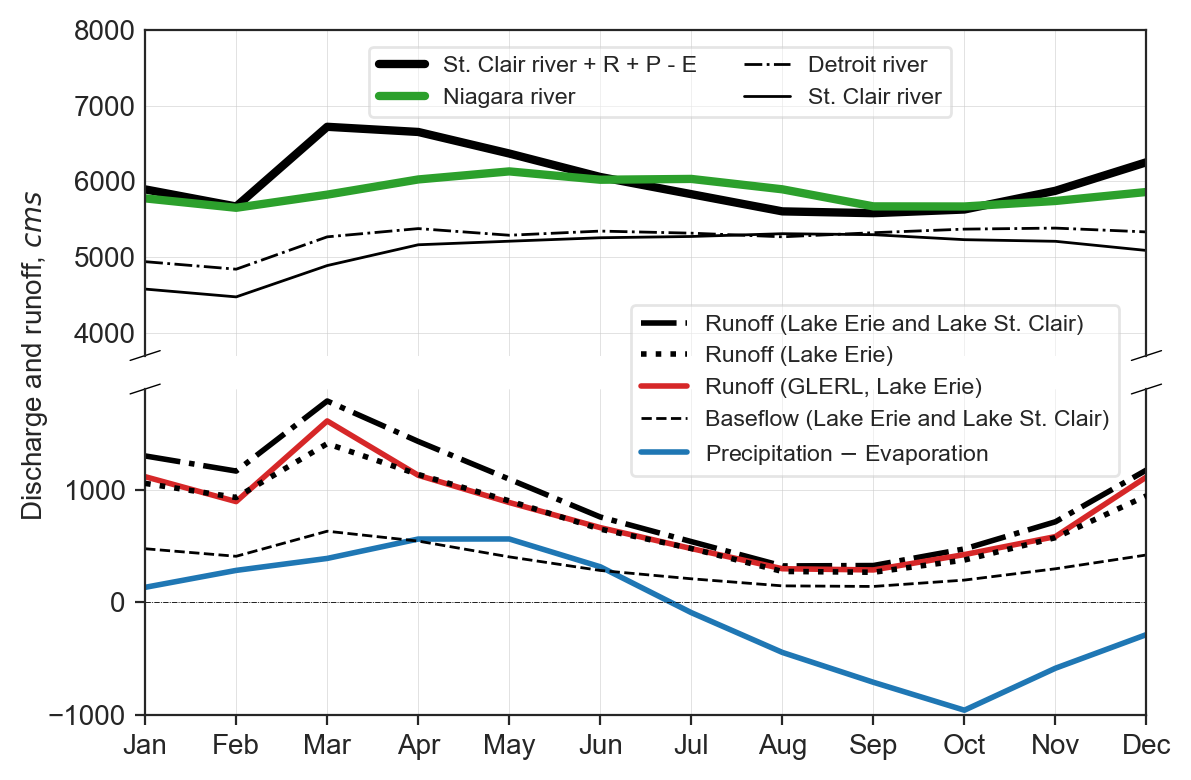

In [70]:
f, axes = plt.subplots(2,1, figsize=(6,4), dpi=200, sharex=True)


gauged_area = 0.75



axes[1].plot(np.linspace(1,12,12), total_runoff/gauged_area, 
          lw=2, ls='-.', c='k', label='Runoff (Lake Erie and Lake St. Clair)',zorder=1)
axes[1].plot(np.linspace(1,12,12), total_runoff_excl/gauged_area, 
          lw=2, ls=':', c='k', label='Runoff (Lake Erie)', zorder=10)
axes[1].plot(np.linspace(1,12,12), 12*conversion_fac_mmy_to_cms*Runoff_mm[105:119].mean()[1:13], 
             c=sns.color_palette()[3], ls='-', lw=2, label='Runoff (GLERL, Lake Erie)')



axes[1].plot(np.linspace(1,12,12), baseflow/gauged_area, 
           c='k', ls='--', lw=1, label='Baseflow (Lake Erie and Lake St. Clair)')

axes[1].plot(np.linspace(1,12,12),
         conversion_fac_mmy_to_cms_incl_clair*365*(noaa_tim_monthly.groupby(noaa_tim_monthly.index.month).mean().OvrLkPrecp-
                                                  noaa_tim_monthly.groupby(noaa_tim_monthly.index.month).mean()[' Evaporatn']),
          lw=2, ls='-', c=sns.color_palette()[0], 
             label='Precipitation $-$ Evaporation',zorder=1)



# axes[1].plot(np.linspace(1,12,12), StClairNS/gauged_area, c=sns.color_palette()[4], lw=1.5, ls='-.', label='St. Clair basin')
# axes[1].plot(np.linspace(1,12,12), WesternNS/gauged_area, c=sns.color_palette()[0], lw=1.5, ls='-.', label='Western basin')
# axes[1].plot(np.linspace(1,12,12), CentralNS/gauged_area, c=sns.color_palette()[1], lw=1.5, ls='-.', label='Central basin')
# axes[1].plot(np.linspace(1,12,12), EasternNS/gauged_area, c=sns.color_palette()[2], lw=1.5, ls='-.', label='Eastern basin')

months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']
plt.xticks(np.linspace(1,12,12), [m[:3] for m in months])

axes[1].set_xlabel('')
axes[1].grid(lw=0.2)
axes[0].grid(lw=0.2)

axes[1].set_ylim(0,None)
axes[1].set_xlim(1,12)
# axes[1].set_ylabel('$mm$')
# axes[1].set_ylabel('River inflows, cms')


axes[1].axhline(y=0, c='k', ls='-.', lw=0.3)




axes[0].plot(np.linspace(1,12,12), total_runoff/gauged_area + st_clair_river + conversion_fac_mmy_to_cms_incl_clair*delta[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']][2002:2016].mean(), c='k', lw=3, label='St. Clair river + R + P - E')
axes[0].plot(np.linspace(1,12,12), niagara, c=sns.color_palette()[2], lw=3, label='Niagara river')
axes[0].plot(np.linspace(1,12,12), detroit, 'k-.', lw=1, label='Detroit river')
axes[0].plot(np.linspace(1,12,12), st_clair_river, c='k' ,lw=1, label='St. Clair river')



axes[0].set_ylim(3700,8000)
axes[1].set_ylim(-1000,1900)

axes[0].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
# axes[0].xaxis.tick_top()
axes[0].tick_params(axis=u'both', which=u'both',length=0)
axes[0].tick_params(labeltop='off')  # don't put tick labels at the top
# axes[1].xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=axes[0].transAxes, color='k', clip_on=False)
axes[0].plot((-d, +d), (-d, +d), **kwargs, lw=0.5)        # top-left diagonal
axes[0].plot((1 - d, 1 + d), (-d, +d), **kwargs, lw=0.5)  # top-right diagonal

kwargs.update(transform=axes[1].transAxes)  # switch to the bottom axes
axes[1].plot((-d, +d), (1 - d, 1 + d), **kwargs, lw=0.5)  # bottom-left diagonal
axes[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs, lw=0.5)  # bottom-right diagonal
plt.subplots_adjust(hspace=0.03, left=0.5)

# axes[0].legend(title='Connecting channels', loc=1,  bbox_transform=f.transFigure, frameon=1, framealpha=0.5, fontsize='small')
# axes[1].legend(title = 'Runoff' ,bbox_to_anchor=(0.89,0.35), loc="lower right",  bbox_transform=f.transFigure, frameon=1, framealpha=0.5, fontsize='small')

axes[0].text(-0.11,0.,'Discharge and runoff, $cms$',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes,
                rotation='vertical')
handles, labels = axes[0].get_legend_handles_labels()
f.legend( handles, labels, loc = (0.31, 0.85), ncol=2, frameon=1, framealpha=0.5, fontsize='small' )
handles, labels = axes[1].get_legend_handles_labels()
f.legend( handles, labels, loc = (0.53, 0.39), ncol=1, frameon=1, framealpha=0.5 ,fontsize='small')
plt.tight_layout()
plt.gcf().subplots_adjust(left=0.12)
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/total_mass_balance_all_montly.pdf', dpi=f.dpi)


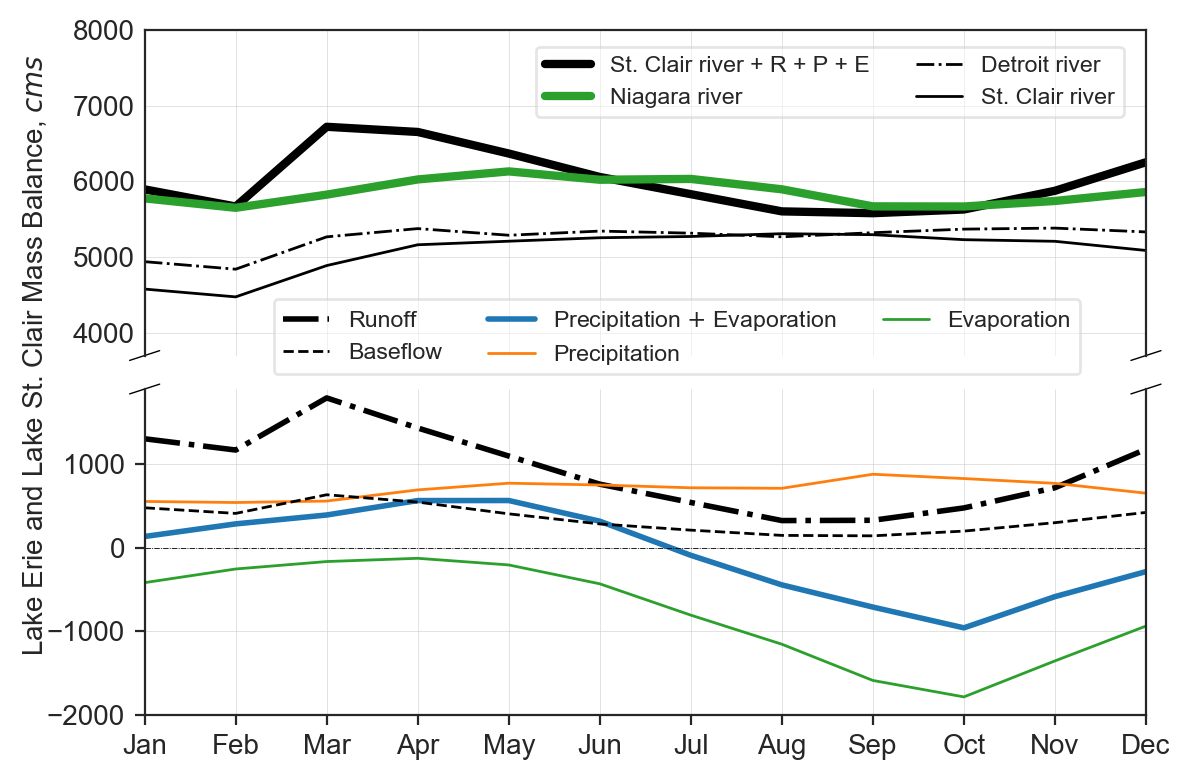

In [92]:
f, axes = plt.subplots(2,1, figsize=(6,4), dpi=200, sharex=True)


gauged_area = 0.75



axes[1].plot(np.linspace(1,12,12), total_runoff/gauged_area, 
          lw=2, ls='-.', c='k', label='Runoff',zorder=1)
# axes[1].plot(np.linspace(1,12,12), total_runoff_excl/gauged_area, 
#           lw=2, ls=':', c='k', label='Runoff (Lake Erie)', zorder=10)
# axes[1].plot(np.linspace(1,12,12), 12*conversion_fac_mmy_to_cms*Runoff_mm[105:119].mean()[1:13], 
#              c=sns.color_palette()[3], ls='-', lw=2, label='Runoff (GLERL, Lake Erie)')



axes[1].plot(np.linspace(1,12,12), baseflow/gauged_area, 
           c='k', ls='--', lw=1, label='Baseflow')

axes[1].plot(np.linspace(1,12,12),
         conversion_fac_mmy_to_cms_incl_clair*365*(noaa_tim_monthly.groupby(noaa_tim_monthly.index.month).mean().OvrLkPrecp-
                                                  noaa_tim_monthly.groupby(noaa_tim_monthly.index.month).mean()[' Evaporatn']),
          lw=2, ls='-', c=sns.color_palette()[0], 
             label='Precipitation $+$ Evaporation',zorder=1)

axes[1].plot(np.linspace(1,12,12),
         conversion_fac_mmy_to_cms_incl_clair*365*(noaa_tim_monthly.groupby(noaa_tim_monthly.index.month).mean().OvrLkPrecp),
          lw=1, ls='-', c=sns.color_palette()[1], 
             label='Precipitation',zorder=1)

axes[1].plot(np.linspace(1,12,12),
         conversion_fac_mmy_to_cms_incl_clair*365*(-
                                                  noaa_tim_monthly.groupby(noaa_tim_monthly.index.month).mean()[' Evaporatn']),
          lw=1, ls='-', c=sns.color_palette()[2], 
             label='Evaporation',zorder=1)

# axes[1].plot(np.linspace(1,12,12), StClairNS/gauged_area, c=sns.color_palette()[4], lw=1.5, ls='-.', label='St. Clair basin')
# axes[1].plot(np.linspace(1,12,12), WesternNS/gauged_area, c=sns.color_palette()[0], lw=1.5, ls='-.', label='Western basin')
# axes[1].plot(np.linspace(1,12,12), CentralNS/gauged_area, c=sns.color_palette()[1], lw=1.5, ls='-.', label='Central basin')
# axes[1].plot(np.linspace(1,12,12), EasternNS/gauged_area, c=sns.color_palette()[2], lw=1.5, ls='-.', label='Eastern basin')

months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']
plt.xticks(np.linspace(1,12,12), [m[:3] for m in months])

axes[1].set_xlabel('')
axes[1].grid(lw=0.2)
axes[0].grid(lw=0.2)

axes[1].set_ylim(0,None)
axes[1].set_xlim(1,12)
# axes[1].set_ylabel('$mm$')
# axes[1].set_ylabel('River inflows, cms')


axes[1].axhline(y=0, c='k', ls='-.', lw=0.3)




axes[0].plot(np.linspace(1,12,12), total_runoff/gauged_area + st_clair_river + conversion_fac_mmy_to_cms_incl_clair*delta[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']][2002:2016].mean(), c='k', lw=3, label='St. Clair river + R + P + E')
axes[0].plot(np.linspace(1,12,12), niagara, c=sns.color_palette()[2], lw=3, label='Niagara river')
axes[0].plot(np.linspace(1,12,12), detroit, 'k-.', lw=1, label='Detroit river')
axes[0].plot(np.linspace(1,12,12), st_clair_river, c='k' ,lw=1, label='St. Clair river')



axes[0].set_ylim(3700,8000)
axes[1].set_ylim(-2000,1900)

axes[0].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
# axes[0].xaxis.tick_top()
axes[0].tick_params(axis=u'both', which=u'both',length=0)
axes[0].tick_params(labeltop='off')  # don't put tick labels at the top
# axes[1].xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=axes[0].transAxes, color='k', clip_on=False)
axes[0].plot((-d, +d), (-d, +d), **kwargs, lw=0.5)        # top-left diagonal
axes[0].plot((1 - d, 1 + d), (-d, +d), **kwargs, lw=0.5)  # top-right diagonal

kwargs.update(transform=axes[1].transAxes)  # switch to the bottom axes
axes[1].plot((-d, +d), (1 - d, 1 + d), **kwargs, lw=0.5)  # bottom-left diagonal
axes[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs, lw=0.5)  # bottom-right diagonal
plt.subplots_adjust(hspace=0.03, left=0.5)

# axes[0].legend(title='Connecting channels', loc=1,  bbox_transform=f.transFigure, frameon=1, framealpha=0.5, fontsize='small')
# axes[1].legend(title = 'Runoff' ,bbox_to_anchor=(0.89,0.35), loc="lower right",  bbox_transform=f.transFigure, frameon=1, framealpha=0.5, fontsize='small')

axes[0].text(-0.11,0.,'Lake Erie and Lake St. Clair Mass Balance, $cms$',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes,
                rotation='vertical')
handles, labels = axes[0].get_legend_handles_labels()
f.legend( handles, labels, loc = (0.45, 0.85), ncol=2, frameon=1, framealpha=0.5, fontsize='small' )
handles, labels = axes[1].get_legend_handles_labels()
f.legend( handles, labels, loc = (0.23, 0.52), ncol=3, frameon=1, framealpha=0.5, fontsize='small' )
plt.tight_layout()
plt.gcf().subplots_adjust(left=0.12)
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/total_mass_balance_all_montly_no_glerl.pdf', dpi=f.dpi)
